Inspect the sizes and visualize light curves from the LSST and Kepler RR Lyrae datasets.

#### Import libraries
Importing the libraries that we will work with in the project.

In [17]:
import os
import pandas as pd
import lcanalyzer.views as views

## Params
parameters that may be used later on.

In [18]:
plot_filter_labels = ["u", "g", "r", "i", "z", "y"]
plot_filter_colors = {"u": "#56b4e9",
                      "g": "#008060",
                      "r": "#ff4000",
                      "i":"#850000", 
                      "z": "#6600cc",
                      "y": "#000000"
                     }
plot_filter_symbols = {"u":"o","g":"^","r":"v","i":"s","z":"*","y": "p"}

#### Read the data
Reading the data from the /data directory using the pandas lib.

In [19]:
os.listdir("data")

['.DS_Store',
 'lsst_RRLyr.csv',
 'kepler_RRLyr.csv',
 'lsst_RRLyr.pkl',
 'lsst_RRLyr_protocol_4.pkl']

In [20]:
LcDatasets = {}
#LcDatasets["lsst"] = pd.read_pickle(os.path.join("data", "lsst_RRLyr.pkl"))
#LcDatasets["lsst"] = pd.read_pickle(os.path.join("data", "lsst_RRLyr_protocol_4.pkl"))
LcDatasets["lsst"] = pd.read_csv(os.path.join("data", "lsst_RRLyr.csv"))
LcDatasets["kepler"] = pd.read_csv(os.path.join("data", "kepler_RRLyr.csv"))

#### Inspect datasets
Printing the data tables to inspect them visually.

In [21]:
LcDatasets["lsst"].head()

,Unnamed: 0,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.6023
1,1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.6061
2,2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.4691
3,3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.6128
4,4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.4612


In [22]:
LcDatasets["kepler"].head()

,time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,131.512404,10180609.0,78.926155,128,0.001410,653.372470,51.053028,1105,10129629.0,79.186980,...,NaN,NaN,NaN,NaN,653.372470,0.000006,51.053028,0.000063,0.011782,-0.010195
1,131.532839,10013518.0,78.233770,128,0.001411,653.372292,51.053872,1106,9949931.0,78.459984,...,NaN,NaN,NaN,NaN,653.372292,0.000006,51.053872,0.000062,0.011726,-0.010246
2,131.553273,9852474.0,77.673160,128,0.001412,653.372167,51.044559,1107,9783633.0,77.827200,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.044559,0.000062,0.011575,-0.010089
3,131.573707,9722936.0,77.109710,128,0.001413,653.371408,51.045081,1108,9651452.0,77.313590,...,NaN,NaN,NaN,NaN,653.371408,0.000006,51.045081,0.000062,0.011366,-0.009939
4,131.594142,9717073.0,77.103550,0,0.001414,653.372167,51.052828,1109,9646289.0,77.262634,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.052828,0.000062,0.011526,-0.010702


In [23]:
LcDatasets["kepler"].columns

Index(['time', 'flux', 'flux_err', 'quality', 'timecorr', 'centroid_col',
       'centroid_row', 'cadenceno', 'sap_flux', 'sap_flux_err', 'sap_bkg',
       'sap_bkg_err', 'pdcsap_flux', 'pdcsap_flux_err', 'sap_quality',
       'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err',
       'mom_centr1', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err',
       'pos_corr1', 'pos_corr2'],
      dtype='object')

In [24]:
LC = LcDatasets["lsst"]["objectId"].unique()[7]
LC = LcDatasets["lsst"][LcDatasets["lsst"]["objectId"] == LC]

In [25]:
bands = {}
for b in plot_filter_labels:
    bands[b] = LC["band"] == b

In [26]:
len(LC)

421

In [27]:
b = 'z'

#### Visialization of a light curve
Plotting the light curve.

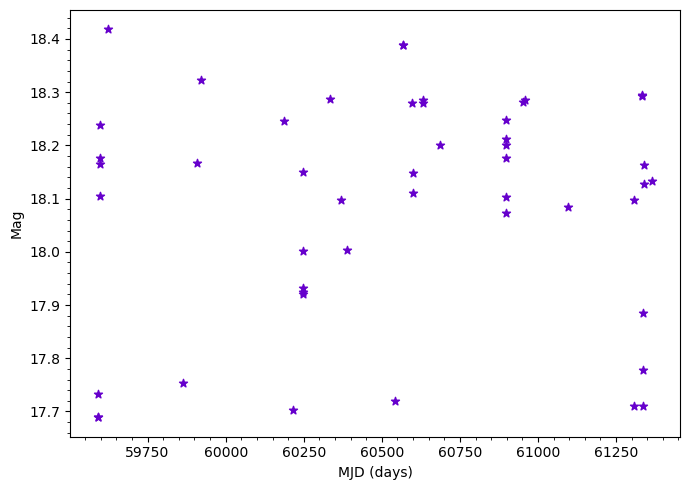

In [28]:
views.plotUnfolded(LC[bands[b]], time_col="expMidptMJD", mag_col="psfMag", color=plot_filter_colors[b], marker=plot_filter_symbols[b])

In [ ]:
print("Hello Noi, nice to work with LSST light curves.")
# Did minor edits to the models.py and added a new plotting code plots.py.